## Exercise 2: Border Following and Chain Codes

### Overview

This exercise focuses on extracting, analyzing, and representing the boundary of an object using three major techniques:

1. **Boundary Following Algorithm** – Manually implementing the contour-following method described in Section 11.1.1 of the textbook, applied to the "leaf.tif" image.
2. **Chain Code Representation** – Extracting the chain code from the boundary obtained, after performing boundary subsampling to reduce point density.
3. **Fourier Descriptors** – Applying the Fourier descriptor method described in Section 11.2.3 to represent the boundary in the frequency domain and reduce the number of descriptors while maintaining the recognizability of the shape.

### Constraints

- Use of built-in functions for boundary detection and chain code extraction is **not allowed**.
- All algorithms must be implemented manually based on the concepts provided in the textbook.


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

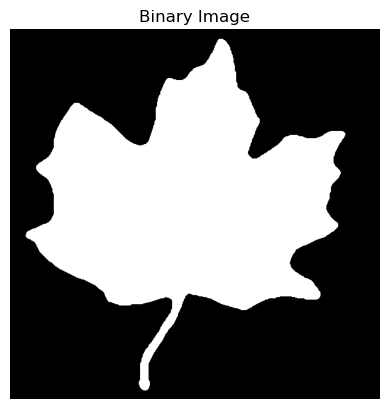

In [3]:
img = cv2.imread("/mnt/e/Term 4/HW/DIP-HW9/data/Images/leaf.tif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

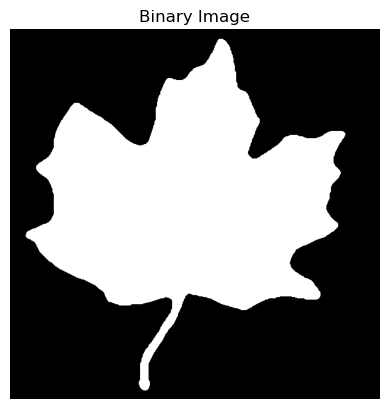

Utso threshold is: 0.0


In [4]:
# binarize the image
threshold_utso, binary = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(binary*255.0, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

print(f'Utso threshold is: {threshold_utso}')

In [5]:
# Pad the binary image to avoid index errors at the borders
binary = np.pad(binary, ((1, 1), (1, 1)), mode='constant')

In [6]:
# Define 8-connected neighbor directions (clockwise)
neighbors = [(-1, 0), (-1, 1), (0, 1), (1, 1),
             (1, 0), (1, -1), (0, -1), (-1, -1)]

In [7]:
# Define 8-connected neighbor directions (clockwise)
neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1),
             (1, 0), (1, -1), (0, -1)]

In [8]:
# Find the top-left most foreground pixel (b0)
cords = np.argwhere(binary == 1)
cords

array([[ 16, 321],
       [ 16, 322],
       [ 16, 323],
       ...,
       [553, 207],
       [553, 208],
       [553, 209]])

In [9]:
b0 = cords[0]
b = b0.copy()
c = b + [0, -1]

In [10]:
boundary = [b.tolist()]
visited = set()
visited.add(tuple(b))

In [12]:
b0 = cords[0]
b = b0.copy()
c = b + [0, -1]
boundary = [b.tolist()]

neighbor_idx = 0

while True:
    found = False

    for i in range(len(neighbors)):
        idx = (neighbor_idx + i) % 8

        candidate = tuple(b_i + n_i for b_i, n_i in zip(b, neighbors[idx]))
        dx, dy = candidate

        if binary[dx, dy] == 1:
            idx_c = (idx -1) % 8 
            neighbor_idx = idx_c - 2
            c = tuple(b_i + n_i for b_i, n_i in zip(b, neighbors[idx_c]))
            b = candidate
            boundary.append(candidate)
            found = True
            break

    if not found or np.array_equal(b, b0):
        break

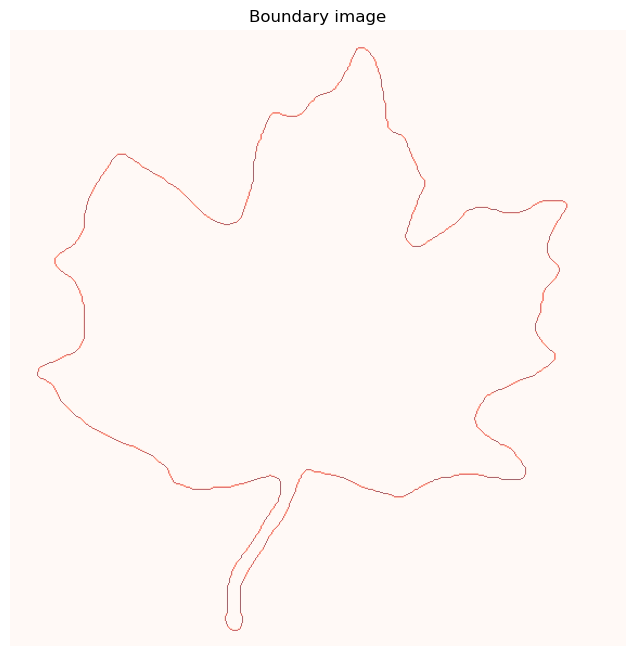

In [13]:
boundary_image = np.zeros_like(binary)

for _, y in enumerate(boundary):
    boundary_image[y[0], y[1]] = 1


plt.figure(figsize=(8,8))       
plt.imshow(boundary_image, cmap='Reds', alpha=0.6) 
plt.title("Boundary image")
plt.axis('off')
plt.show()

In [14]:
boundary

[[16, 321],
 (16, 322),
 (16, 323),
 (16, 324),
 (16, 325),
 (16, 326),
 (17, 327),
 (18, 328),
 (18, 329),
 (19, 330),
 (20, 331),
 (21, 332),
 (22, 332),
 (23, 333),
 (24, 334),
 (25, 335),
 (26, 335),
 (27, 336),
 (28, 336),
 (29, 337),
 (30, 337),
 (31, 337),
 (32, 337),
 (33, 338),
 (34, 338),
 (35, 339),
 (36, 339),
 (37, 339),
 (38, 339),
 (39, 340),
 (40, 340),
 (41, 341),
 (42, 341),
 (43, 341),
 (44, 341),
 (45, 342),
 (46, 342),
 (47, 342),
 (48, 342),
 (49, 342),
 (50, 342),
 (51, 342),
 (52, 342),
 (53, 343),
 (54, 343),
 (55, 343),
 (56, 344),
 (57, 344),
 (58, 344),
 (59, 344),
 (60, 344),
 (61, 344),
 (62, 344),
 (63, 344),
 (64, 344),
 (65, 345),
 (66, 345),
 (67, 346),
 (68, 346),
 (69, 346),
 (70, 346),
 (71, 346),
 (72, 346),
 (73, 346),
 (74, 346),
 (75, 346),
 (76, 346),
 (77, 346),
 (78, 346),
 (79, 346),
 (80, 346),
 (81, 346),
 (82, 347),
 (83, 347),
 (84, 348),
 (85, 348),
 (86, 348),
 (87, 348),
 (88, 348),
 (89, 348),
 (90, 349),
 (91, 350),
 (92, 351),
 (93

___

# Part b

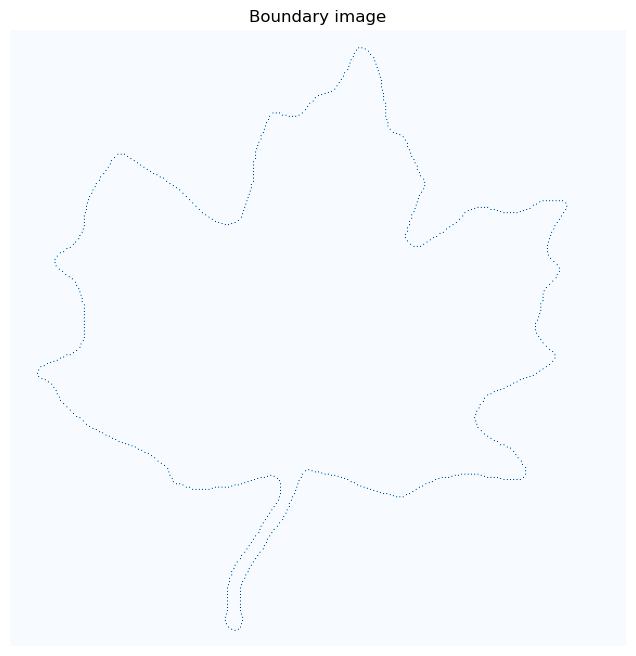

In [54]:
step = 3

resampled_image = boundary[::step]

boundary_image_resampled = np.zeros_like(binary)

for _, y in enumerate(resampled_image):
    boundary_image_resampled[y[0], y[1]] = 1


plt.figure(figsize=(8,8))       
plt.imshow(boundary_image_resampled, cmap='Blues', alpha=1) 
plt.title("Boundary image")
plt.axis('off')
plt.show()

In [61]:
boundaries_points = np.argwhere(boundary_image_resampled == 1)

In [ ]:
codes = []

for i in range(boundaries_points.shape[0]):
    current_point = tuple(boundaries_points[i])
    
    if i == (boundaries_points.shape[0] - 1):
        next_point = tuple(boundaries_points[0])
    else:
        next_point = tuple(boundaries_points[i+1])
    
    x1, y1 = current_point
    x2, y2 = next_point

    dx = x2 - x1
    dy = y2 - y1
    
    angle_rad = math.atan2(dx, dy)
    angle_deg = math.degrees(angle_rad)
    angle = (angle_deg + 360) % 360

    #  code = int((angle + 22.5) // 45) % 8    

    if 337.5 <= angle or angle < 22.5:
        code = 0  
    elif 22.5 <= angle < 67.5:
        code = 7  
    elif 67.5 <= angle < 112.5:
        code = 6  
    elif 112.5 <= angle < 157.5:
        code = 5  
    elif 157.5 <= angle < 202.5:
        code = 4  
    elif 202.5 <= angle < 247.5:
        code = 3  
    elif 247.5 <= angle < 292.5:
        code = 2  
    elif 292.5 <= angle < 337.5:
        code = 1  
    
    codes.append(code)

codes


[0,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 0,
 4,
 5,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,


# Part c

Number of points on boundary is: 2719


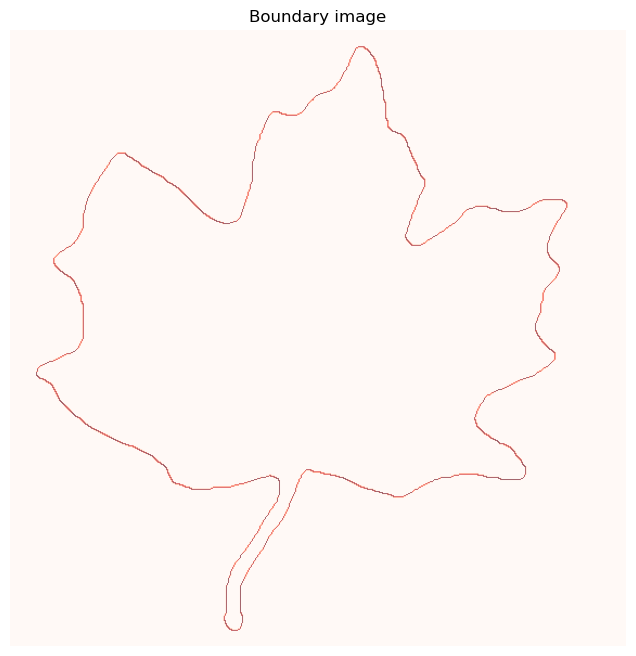

In [19]:
from skimage.measure import find_contours


# To find boundary of an image
contours = find_contours(image=binary, level=0.5)
boundary = contours[0]
print(f'Number of points on boundary is: {boundary.shape[0]}')

boundary_image = np.zeros_like(binary)

for _, point in enumerate(boundary):
    boundary_image[int(point[0]), int(point[1])] = 1


plt.figure(figsize=(8,8))       
plt.imshow(boundary_image, cmap='Reds', alpha=0.6) 
plt.title("Boundary image")
plt.axis('off')
plt.show()


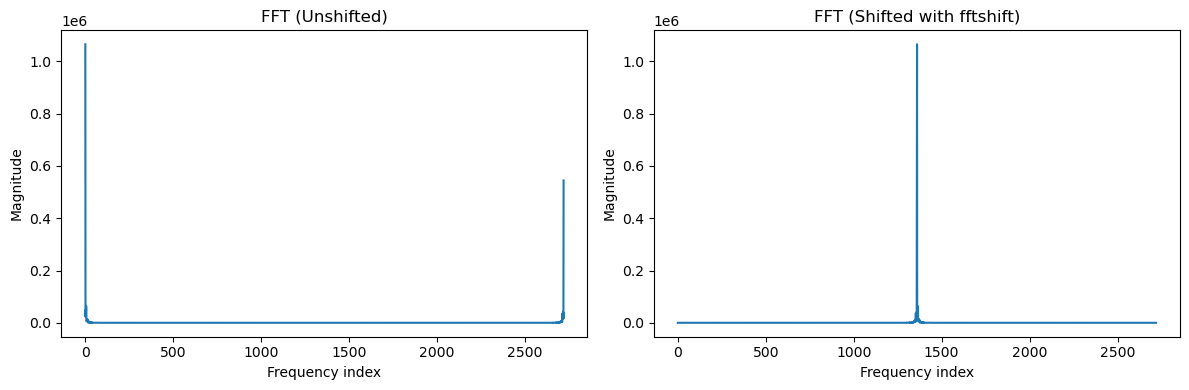

In [27]:
np_pts = boundary.shape[0]
if np_pts % 2 != 0:
    boundary = np.vstack([boundary, boundary[-1]])
    np_pts += 1

complex_boundary = boundary[:, 0] + 1j * boundary[:, 1]
fft_boundary = np.fft.fft(a=complex_boundary)
fft_boundary_shift = np.fft.fftshift(fft_boundary)

magnitude = np.abs(fft_boundary)
magnitude_centered = np.abs(fft_boundary_shift)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(magnitude)
plt.title("FFT (Unshifted)")
plt.xlabel("Frequency index")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(magnitude_centered)
plt.title("FFT (Shifted with fftshift)")
plt.xlabel("Frequency index")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

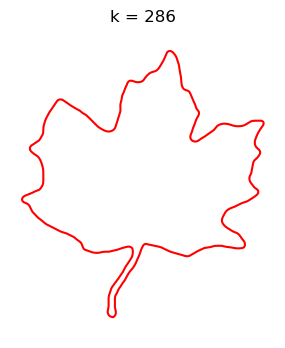

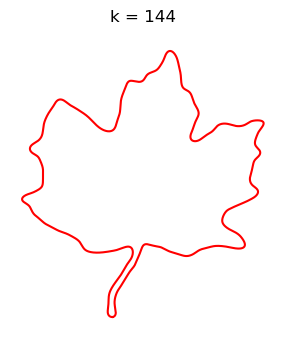

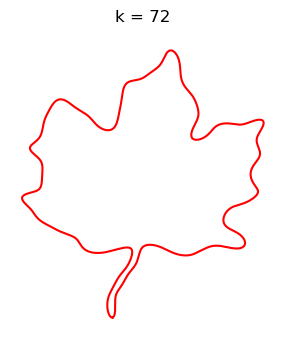

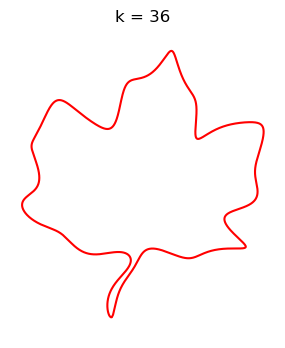

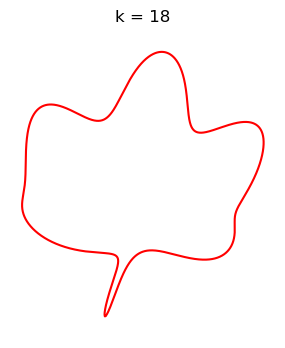

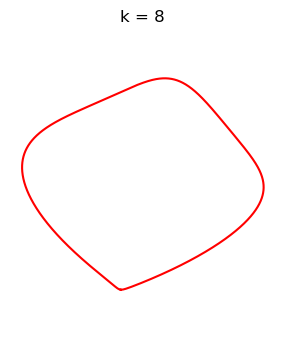

In [ ]:
nums = [286, 144, 72, 36, 18, 8]

for i, num in enumerate(nums):
    selected = fft_boundary[:num]
    fft_copy = np.zeros_like(fft_boundary)

    fft_copy[:num//2] = fft_boundary[:num//2]
    fft_copy[-num//2:] = fft_boundary[-num//2:] 
    approx_ifft = np.fft.ifft(fft_copy)

    real_approx = np.real(approx_ifft)
    imag_approx = np.imag(approx_ifft)

    approx = np.vstack([real_approx, imag_approx]).T
    
    plt.figure(figsize=(24, 4))
    plt.subplot(1,len(nums),i+1)
    plt.plot(approx[:,1], -approx[:,0], 'r-')
    plt.title(f"k = {num}")
    plt.axis('equal')
    plt.axis('off')